In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re
import warnings
warnings.filterwarnings("ignore")

In [28]:
exams  = pd.read_csv("exams.csv")
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,master's degree,standard,none,84,73,72
1,male,group D,associate's degree,standard,none,94,92,93
2,male,group B,high school,standard,completed,73,76,70
3,male,group B,high school,standard,completed,60,60,55
4,male,group D,some high school,standard,completed,78,85,82
...,...,...,...,...,...,...,...,...
95,male,group C,some high school,standard,completed,44,41,41
96,female,group B,some high school,standard,completed,89,97,92
97,female,group B,some college,standard,none,88,93,91
98,male,group B,high school,standard,none,59,63,55


In [29]:
exams.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,master's degree,standard,none,84,73,72
1,male,group D,associate's degree,standard,none,94,92,93
2,male,group B,high school,standard,completed,73,76,70
3,male,group B,high school,standard,completed,60,60,55
4,male,group D,some high school,standard,completed,78,85,82
5,female,group D,associate's degree,standard,none,81,91,85
6,female,group A,high school,free/reduced,completed,52,61,61
7,male,group D,high school,standard,none,85,72,78
8,female,group C,some college,standard,none,75,90,92
9,male,group C,some high school,standard,completed,63,72,69


In [30]:
exams.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
90,male,group D,associate's degree,free/reduced,none,82,76,81
91,female,group C,high school,standard,none,57,66,65
92,female,group D,associate's degree,standard,completed,67,79,87
93,male,group C,associate's degree,free/reduced,none,69,64,64
94,female,group C,some college,standard,none,50,65,61
95,male,group C,some high school,standard,completed,44,41,41
96,female,group B,some high school,standard,completed,89,97,92
97,female,group B,some college,standard,none,88,93,91
98,male,group B,high school,standard,none,59,63,55
99,male,group C,high school,standard,none,73,68,67


In [31]:
exams.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
63,male,group D,some high school,free/reduced,none,59,50,47
82,female,group B,high school,standard,none,42,51,46
91,female,group C,high school,standard,none,57,66,65
56,male,group C,associate's degree,free/reduced,none,64,70,60
19,male,group A,high school,free/reduced,none,42,38,32


In [32]:
exams.columns.to_list()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [33]:
exams.shape

(100, 8)

In [24]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [34]:
exams.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Questions
- What are the average reading scores for students with/without the test preparation course?
- What are the average scores for the different parental education levels?
- Create plots to visualize findings for questions 1 and 2.
- [Optional] Look at the effects within subgroups. Compare the average scores for students 
with/without the test preparation course for different parental education levels (e.g., faceted plots).
- [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. 
Look at the correlations between scores.
- Summarize your findings.

#### 1. average reading scores for students with/without the test preparation course

In [37]:
exams.groupby("test preparation course")[["reading score"]].mean()


,reading score
test preparation course,
completed,73.346154
none,66.054054


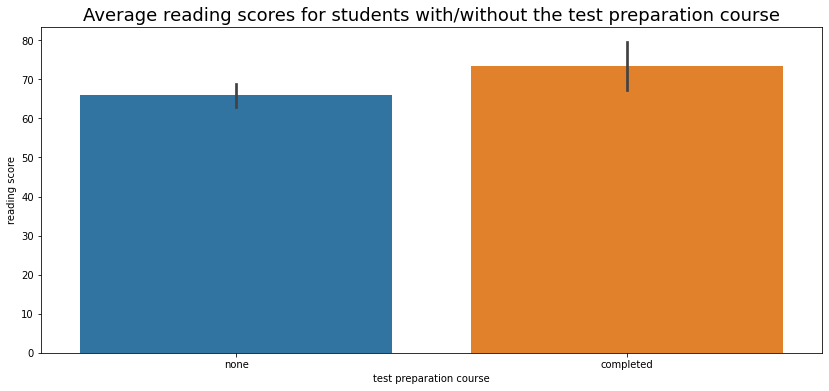

In [39]:
#3a Visualization for Qstn 1.
plt.figure(figsize = (14,6))
sns.barplot(x = "test preparation course", y = "reading score", data = exams)
plt.title("Average reading scores for students with/without the test preparation course", fontsize = 18)
plt.show()

In [42]:
parents = exams.groupby('parental level of education')['reading score','math score', 'writing score'].mean()
parents

,reading score,math score,writing score
parental level of education,,,
associate's degree,72.318182,71.590909,71.772727
bachelor's degree,71.888889,71.444444,71.111111
high school,63.680000,62.680000,60.840000
master's degree,69.000000,65.800000,70.400000
some college,67.000000,63.523810,66.809524
some high school,67.388889,64.888889,64.166667


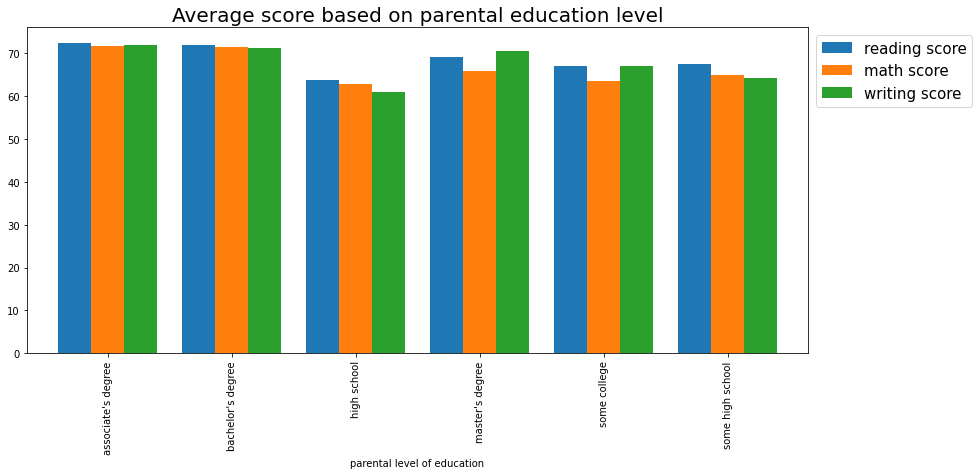

In [44]:
#3 b. Visualization for Qstn2

parents.plot(kind = 'bar', width = 0.8, figsize = (14,6))
plt.legend(bbox_to_anchor =(1,1), fontsize = 15)
plt.title("Average score based on parental education level", fontsize = 20)
plt.show()

#### 4. [Optional] Look at the effects within subgroups. Compare the average scores for students
#### with/without the test preparation course for different parental education levels (e.g., faceted plots).

In [54]:
# Make a copy of the dataframe.
exams2 = exams.copy()

In [55]:
exams2.rename(columns = {'parental level of education':'parental_level_of_education', 'test preparation course':'test_preparation_course',
                              'math score':'math_score','reading score':'reading_score', 'writing score':'writing_score'}, inplace = True)

exams2

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group B,master's degree,standard,none,84,73,72
1,male,group D,associate's degree,standard,none,94,92,93
2,male,group B,high school,standard,completed,73,76,70
3,male,group B,high school,standard,completed,60,60,55
4,male,group D,some high school,standard,completed,78,85,82
...,...,...,...,...,...,...,...,...
95,male,group C,some high school,standard,completed,44,41,41
96,female,group B,some high school,standard,completed,89,97,92
97,female,group B,some college,standard,none,88,93,91
98,male,group B,high school,standard,none,59,63,55


In [57]:
exams2['Average_score'] = round((exams2.math_score + exams2.reading_score + exams2.writing_score)/ 3,2)
exams2.sample(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average_score
39,male,group D,associate's degree,standard,none,61,54,56,57.00
72,female,group E,some college,free/reduced,none,59,71,73,67.67


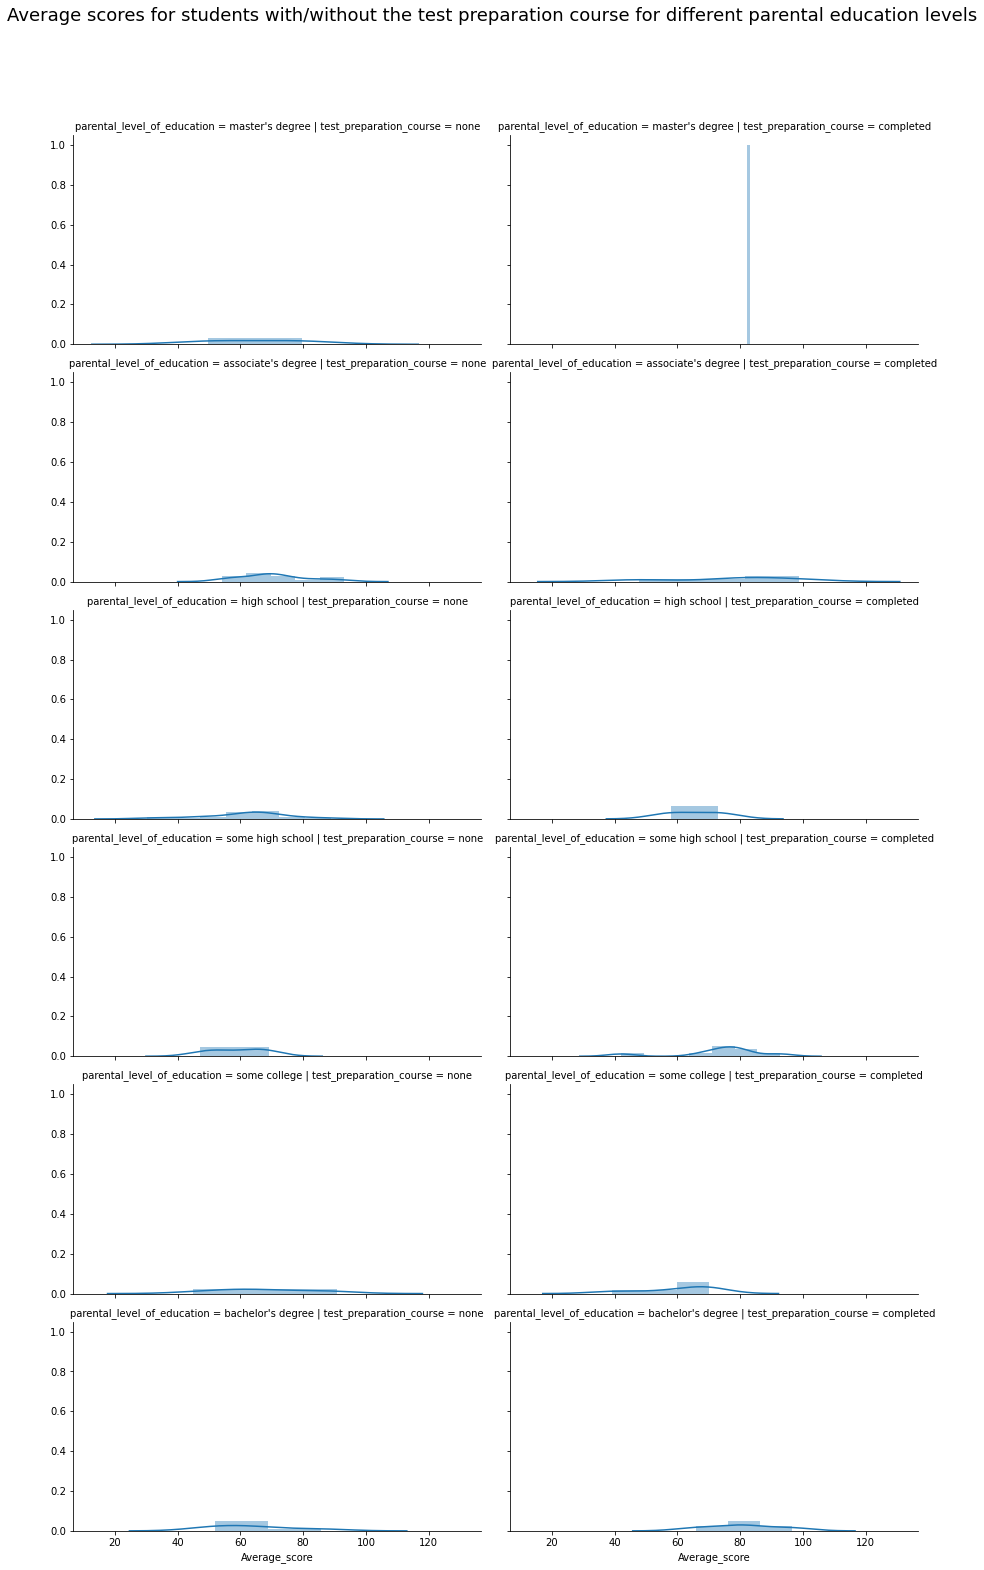

In [58]:
graph = sns.FacetGrid(exams2, row = 'parental_level_of_education', col = 'test_preparation_course', height = 3.7,aspect = 1.7)
graph = graph.map(sns.distplot,'Average_score')
graph.fig.subplots_adjust(top = 0.9)
graph.fig.suptitle("Average scores for students with/without the test preparation course for different parental education levels",
               fontsize = 18)
plt.show()

#### 5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. 
#### Look at the correlations between scores.

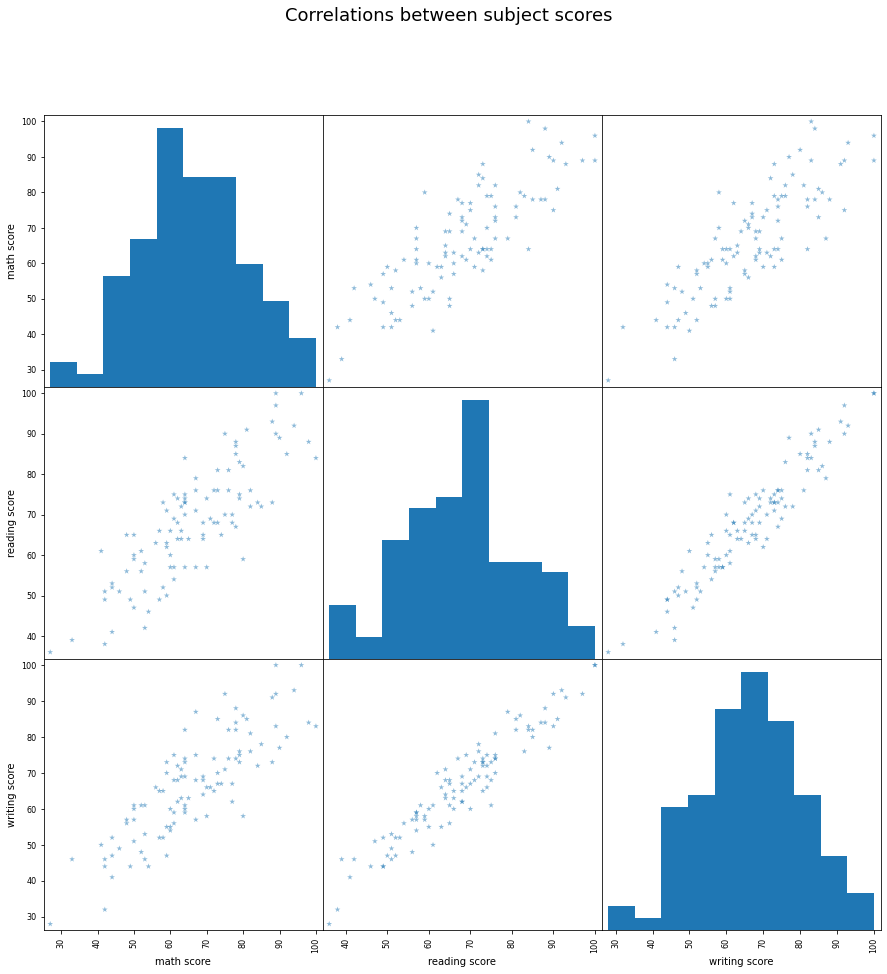

In [53]:
pd.plotting.scatter_matrix(exams2,figsize = (15,15),marker= '*');
plt.suptitle("Correlations between subject scores", fontsize = 18)
plt.show()

# 6. Summarize your findings.

After analysing our data, we made the observation and findings below:
- The students who completed the test preparation course had a higher reading average score compared to those who did not do the test preparation course.
- We observed that the exam scores for math, reading and writing are correlated with the parent education levels. Master's degree students acheived the best average scores for the three exams while parents with high school of education acheived the lowest average scores for the exams. In summary, the difference between the average scores for the different parental education levels is not very wide. Average scores for different parent education levels increase id dependent on the educational level; the more students advanced in their education, the better their scores.
- Average scores for different parent education levels for those that completed the test preparation course and those that did not take the test preparation course showed a symmetrical distribution. This means that the test preparation course has no effect on the student's scores whatsoever. After estimating the mean and the median of the observation, they all occured at the same point for the different levels, thus making it a symmmetrical distribution data.
- Finally, the student's scores are also highly positively correlated for the different subjects; a student who performs well on one subject also performed well on the others and likewise a student who performed poorly in one subject also performed poorly on the others.